In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use(['seaborn-white'])

In [20]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                          test_split=.2,
                                                          seed=111)

In [21]:
mean = np.mean(x_train_full, axis=0)
std = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std

x_train, x_val, y_train, y_val = train_test_split(x_train_preprocessed, y_train_full,
                                                  test_size=.3,
                                                  random_state=111)

In [22]:
model1 = Sequential([Dense(100, activation='relu', input_shape=(13, ), name='dense1'),
                     Dense(64, activation='relu', name='dense2'),
                     Dense(32, activation='relu', name='dense3'),
                     Dense(1, name='output')])

In [23]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 100)               1400      
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 9,977
Trainable params: 9,977
Non-trainable params: 0
_________________________________________________________________


In [24]:
model1.compile(loss='mse',
              optimizer=Adam(learning_rate=1e-2),
              metrics=['mae'])

In [25]:
history1 = model1.fit(x_train, y_train, epochs=300,
                    validation_data=(x_val, y_val))

Epoch 1/300
9/9 [==============================] - 0s 13ms/step - loss: 285.1888 - mae: 14.0729 - val_loss: 132.4612 - val_mae: 9.1090
Epoch 2/300
9/9 [==============================] - 0s 3ms/step - loss: 60.9891 - mae: 5.9218 - val_loss: 31.4368 - val_mae: 4.4589
Epoch 3/300
9/9 [==============================] - 0s 3ms/step - loss: 33.7114 - mae: 4.2293 - val_loss: 22.2753 - val_mae: 3.6017
Epoch 4/300
9/9 [==============================] - 0s 3ms/step - loss: 21.5946 - mae: 3.4391 - val_loss: 13.9826 - val_mae: 2.9190
Epoch 5/300
9/9 [==============================] - 0s 3ms/step - loss: 16.3538 - mae: 2.8935 - val_loss: 11.7222 - val_mae: 2.7147
Epoch 6/300
9/9 [==============================] - 0s 3ms/step - loss: 13.6432 - mae: 2.5889 - val_loss: 10.9746 - val_mae: 2.5883
Epoch 7/300
9/9 [==============================] - 0s 3ms/step - loss: 12.6475 - mae: 2.4426 - val_loss: 9.1843 - val_mae: 2.3985
Epoch 8/300
9/9 [==============================] - 0s 3ms/step - loss: 12.5112 -

In [26]:
model2 = Sequential([Dense(50, activation='relu', input_shape=(13, ), name='dense1'),
                     Dense(32, activation='relu', name='dense2'),
                     Dense(16, activation='relu', name='dense3'),
                     Dense(1, name='output')])

In [27]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 50)                700       
_________________________________________________________________
dense2 (Dense)               (None, 32)                1632      
_________________________________________________________________
dense3 (Dense)               (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 2,877
Trainable params: 2,877
Non-trainable params: 0
_________________________________________________________________


In [28]:
model2.compile(loss='mse',
              optimizer=Adam(learning_rate=1e-2),
              metrics=['mae'])

In [29]:
history2 = model2.fit(x_train, y_train, epochs=300,
                    validation_data=(x_val, y_val))

Epoch 1/300
9/9 [==============================] - 0s 13ms/step - loss: 495.1673 - mae: 20.3546 - val_loss: 375.0005 - val_mae: 16.9627
Epoch 2/300
9/9 [==============================] - 0s 3ms/step - loss: 183.5005 - mae: 10.8714 - val_loss: 78.0087 - val_mae: 7.2249
Epoch 3/300
9/9 [==============================] - 0s 3ms/step - loss: 58.8649 - mae: 5.7306 - val_loss: 49.1845 - val_mae: 5.6499
Epoch 4/300
9/9 [==============================] - 0s 3ms/step - loss: 37.1201 - mae: 4.4714 - val_loss: 27.4636 - val_mae: 4.0299
Epoch 5/300
9/9 [==============================] - 0s 3ms/step - loss: 21.6941 - mae: 3.3422 - val_loss: 18.4441 - val_mae: 3.1299
Epoch 6/300
9/9 [==============================] - 0s 3ms/step - loss: 18.2665 - mae: 2.9807 - val_loss: 13.7596 - val_mae: 2.9880
Epoch 7/300
9/9 [==============================] - 0s 3ms/step - loss: 15.5804 - mae: 2.8650 - val_loss: 15.1235 - val_mae: 2.9430
Epoch 8/300
9/9 [==============================] - 0s 3ms/step - loss: 14.12

In [34]:
epochs = range(1, 301)
model_1_val_loss = history1.history['val_loss']
model_2_val_loss = history2.history['val_loss']

In [35]:
print(model_1_val_loss)

[132.46116638183594, 31.43679428100586, 22.275344848632812, 13.982625961303711, 11.72224235534668, 10.974553108215332, 9.184349060058594, 9.829577445983887, 8.173164367675781, 8.331689834594727, 9.637693405151367, 8.383787155151367, 8.429529190063477, 9.030803680419922, 8.11533260345459, 8.342222213745117, 10.926493644714355, 8.831998825073242, 7.657966136932373, 9.498210906982422, 7.826080799102783, 9.301619529724121, 8.961605072021484, 9.33423137664795, 8.033827781677246, 9.50216007232666, 8.893101692199707, 8.398523330688477, 7.633909702301025, 8.641450881958008, 8.721349716186523, 8.990215301513672, 8.433517456054688, 7.769892692565918, 8.609414100646973, 8.914766311645508, 7.505075454711914, 10.537357330322266, 7.981551170349121, 8.347167015075684, 12.880661010742188, 12.589613914489746, 11.425800323486328, 10.296449661254883, 9.860331535339355, 9.289240837097168, 9.337042808532715, 9.573076248168945, 8.699373245239258, 9.435619354248047, 9.181562423706055, 11.242171287536621, 8.2

In [36]:
import matplotlib.pyplot as plt
plt.style.use(['seaborn-white'])

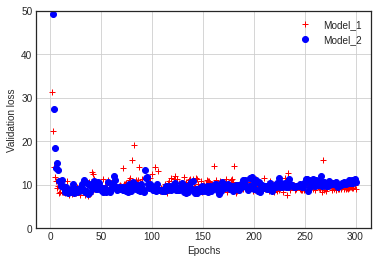

In [38]:
plt.plot(epochs, model_1_val_loss, 'r+', label='Model_1')
plt.plot(epochs, model_2_val_loss, 'bo', label='Model_2')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.ylim(0,50)
plt.grid()
plt.legend()
plt.show()
